In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Day 5: Linear Systems and Gaussian Elimination

In the motivation notebook you read to prepare for this notebook, you were reminded of linear systems and some common approaches for solving these systems. In this notebook, we'll focus on the method called *Gaussian Elimination*, as a reminder, *Gaussian Elimination* involves transforming the system $A\vec{x} = \vec{b}$ into an equivalent system $U\vec{x} = \vec{c}$, where $U$ is an *upper traingular matrix*. That is, $U$ is a matrix in which all entries below the main diagonal are $0$'s. The system $U\vec{x} = \vec{c}$ can then be solved via backward substitution.

## Background Information

A general linear system has the form

$$\left\{\begin{array}{ccccccccc} A_{11}x_1 & + & A_{12}x_2 & + & \cdots & + & A_{1n}x_n & = & b_1\\
A_{21}x_1 & + & A_{22}x_2 & + & \cdots & + & A_{2n}x_n & = & b_2\\
\vdots &  &  &  &  &  &  & \vdots\\
A_{n1}x_1 & + & A_{n2}x_2 & + & \cdots & + & A_{nn}x_n & = & b_n
\end{array}\right.$$

The corresponding system written using matrix multiplication is:

$$\left[\begin{array}{cccc} A_{11} & A_{12} & \cdots & A_{n1}\\
A_{21} & A_{22} & \cdots & A_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
A_{n1} & A_{n2} & \cdots & A_{nn}\end{array}\right]\cdot\left[\begin{array}{c} x_1\\ x_2\\ \vdots\\ x_{n}\end{array}\right] = \left[\begin{array}{c} b_1\\ b_2\\ \vdots\\ b_{n}\end{array}\right]$$

The more compact, augmented matrix form is:

$$\left[\begin{array}{cccc|c} A_{11} & A_{12} & \cdots & A_{n1} & b_1\\
A_{21} & A_{22} & \cdots & A_{2n} & b_2\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
A_{n1} & A_{n2} & \cdots & A_{nn} & b_n\end{array}\right]$$

## Existence and Uniqueness of Solutions

You may remember from Linear Algebra that a [square] system of linear equations has a *unique solution* if the coefficient matrix is *non-singular*. That is, if the determinant of the coefficient matrix is not $0$. If the determinant is $0$, then the system may have no solutions or infinitely many solutions.

+ If a linear system has no solutions, then we say it is and *inconsistent system*.
+ Linear systems with one or infinitely many solutions are said to be *consistent systems*.

In summary, if $\left|A\right| = 0$ then the system is *inconsistent* and if $\left|A\right| \neq 0$,then the system is *consistent*.

**Example:** Compute the determinant for the matrix $A = \left[\begin{array}{ccc} 3.2 & 4.7 & -0.8\\
6.2 & -13 & 8.2\\
2.1 & -0.6 & 1.1\end{array}\right]$. What does this mean about solutions to $A\vec{x} = \vec{b}$ for any $\vec{b}$?

In [ ]:
import numpy as np
A = np.array([[3.2, 4.7, -0.8], [6.2, -13, 8.2], [2.1, -0.6, 1.1]])
np.linalg.det(A)

1.5707435352396774e-14

## Near-Singularity and Conditioning

We've seen that symbolic mathematics and computational mathematics are not exactly identical. In particular, an attempt to store a theoretically infinite number system into a finite amount of memory is not possible. We encounter rounding errors with floating point numbers -- we saw this issue when we tested `0.1 + 0.2 == 0.3`, and saw that the result was `False`. Considering whether numerically derived solutions are to be trusted will be a constant theme throughout our course.

Consider the following linear equations: (i) $\left\{\begin{array}{lcl} 2x_1 + x_2 & = & 3\\ 2x_1 + 1.001x_2 & = & 0\end{array}\right.$ and $\left\{\begin{array}{lcl} 2x_1 + x_2 & = & 3\\ 2x_1 + 1.002x_2 & = & 0\end{array}\right.$. The first system has solution $\boxed{~x_1 = 1501.5,~x_2 = -3000~}$ but the second system has solution $\boxed{~x_1 = 751.5,~x_1 = -1500~}$. A $0.1\%$ change in one of the coeffcients produced a $100\%$ change in the solution.





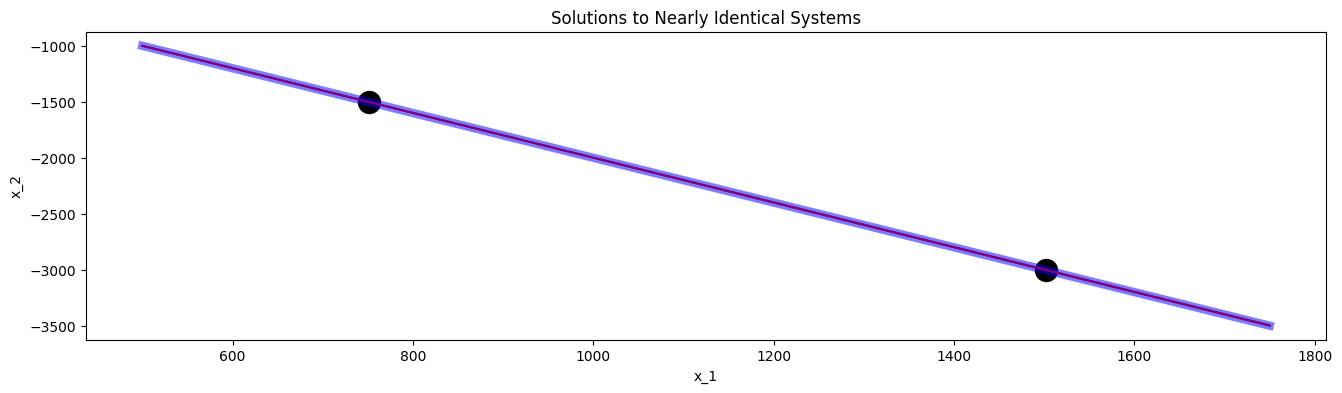

In [ ]:
#@title
x1_vals = np.linspace(500, 1750)

sys1_x2_vals1 = 3 - 2*x1_vals
sys1_x2_vals2 = -2*x1_vals/1.001

sys2_x2_vals1 = 3 - 2*x1_vals
sys2_x2_vals2 = -2*x1_vals/1.002

plt.figure(figsize = (16, 4))
plt.plot(x1_vals, sys1_x2_vals1, color = "blue", linewidth = 6, alpha = 0.3)
plt.plot(x1_vals, sys1_x2_vals2, color = "blue", linewidth = 6, alpha = 0.3)

plt.plot(x1_vals, sys2_x2_vals1, color = "purple")
plt.plot(x1_vals, sys2_x2_vals2, color = "purple")

plt.scatter(1501.5, -3000, s = 250, color = "black")
plt.scatter(751.5, -1500, s = 250, color = "black")

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Solutions to Nearly Identical Systems")

plt.show()

In the plot above it is difficult to identify that three distinct lines are being plotted. All of the lines are nearly parallel to one another. The black dot to the left is the solution to system (ii) while the black dot to the right is the solution to system (i). We can visually observe the impact that such a tiny change on the coefficient of $x_2$ had on the solution to our system.

When such small changes (perhaps rounding errors) can lead to such drastic changes in a solution, we need to be worried that our numerical techniques may produce untrustowrthy results.

### Conditioning

For the system $\left\{\begin{array}{lcl} 2x_1 + x_2 & = & 3\\ 2x_1 + 1.001x_2 & = & 0\end{array}\right.$, the determinant of the coefficient matrix is:

\begin{align*} \left|\begin{array}{cc} 2 & 1\\ 2 & 1.001\end{array}\right| &= 2\left(1.001\right) - 1\left(2\right)\\
&= 2.002 - 2\\
&= 0.002
\end{align*}

This determinant is close to $0$ and is on a much smaller scale than the coefficients of the system. We'll use this as a *rule of thumb*.

**Rule of Thumb (Conditioning):** If $\left|A\right|$ is *much smaller* than the magnitudes of the individual elements in the matrix, then the coefficient matrix $A$ is said to be *ill-conditioned*.

This rule of thumb is more convenient to follow than by using a *conditioning number* for a matrix since the *conditioning number* is expensive to compute for large matrices. For completeness, the definition of a conditioning number on a matrix appears below.

**Definition (Matrix Condition Number):** Given an invertible matrix $A$, the condition number is denoted by $\text{cond}\left(A\right)$ and is computed as $\text{cond}\left(A\right) = \|A\|\cdot\|A^{-1}\|$. If $A$ is a non-invertible matrix, then its condition number is defined to be $\infty$.

In the definition above, $\|M\|$ denotes a norm of the matrix $M$. Common matrix norms are the *Euclidean norm*: $\displaystyle{\|M\|_{e} = \sqrt{\sum_{i = 1}^{n}{\sum_{j = 1}^{n}{M_{ij}^2}}}}$ or the *row-sum-norm* $\displaystyle{\|M\|_{\infty} = \max_{1\leq i\leq n}{\sum_{j = 1}^{n}{|M_{ij}|}}}$ (also called the *infinity norm*). Given that there are different choices for matrix norm, the condition number of a matrix is dependent on the chosen norm. This is another reason that we choose to proceed with our *rule of thumb* instead of insisting on using the condition number for our coefficient matrix.

**Example (Conditioning):** Evaluate the determinant and use the result to determine whether the corresponding matrix is singular, ill-conditioned, or well-conditioned. Compute the determinant by hand and then use `np.linalg.inv()` to compute the inverse of the matrix and verify your results.

$$B = \left[\begin{array}{rrr} 4 & -2 & 0\\ -2 & 4 & -2\\ 0 & -2 & 4\end{array}\right]$$

> *Solution.*



### A Guiding Example for Solving a Linear System

Consider the system $\left\{\begin{array}{lcl} 4x_1 - 2x_2 + x_3 & = & 11\\
-2x_1 + 4x_2 - 2x_3 & = & -16\\
x_1 - 2x_2 + 4x_3 & = & 17\end{array}\right.$

Complete the following:

1. Construct the coefficient matrix $A$ for the system.
2. Find the determinant, $|A|$, and use our *rule of thumb* for determining whether the coefficient matrix is *ill-conditioned* and discuss what that means.
3. Construct the system $A\vec{x} = \vec{b}$ and also write down the augmented coefficient matrix for the system.
4. Use *elementary operations* to transform the system into an equivalent system of the form $U\vec{x} = \vec{c}$ where $U$ is an *upper triangular matrix*.
5. Use backward substitution to obtain the solution to the system.

**Note:** $|A| = 0$ if and only if $|U| = 0$, although generally $|A| \neq |U|$. This is a nice property, since $|U|$ is much easier to compute than $|A|$.

**Comment:** When making a row operation of the form $R_{i} \leftarrow R_i + \lambda R_j$, we call $R_j$ the *pivot row*.

## Algorithm for Gaussian Elimination

In this section, we'll derive an algorithm for Gaussian Elimination. We'll the implement that algorithm in Python. The algorithm will come in two phases: *elimination* and *back-substitution*, just like our "by hand" approach to the small example we just completed.



### Elimination Phase

Let's consider that the first $k-1$ rows of the augmented coefficient matrix have already been converted to upper triangular form:

$$\left[\begin{array}{ccccccccc|c} A_{11} & A_{12} & A_{13} & \cdots & A_{1k} & \cdots & A_{1j} & \cdots & A_{1n} & b_1\\
0 & A_{22} & A_{23} & \cdots & A_{2k} & \cdots & A_{1j} & \cdots & A_{2n} & b_2\\
0 & 0 & A_{33} & \cdots & A_{3k} & \cdots & A_{1j} & \cdots & A_{3n} & b_3\\
\vdots & \vdots & \vdots &  & \vdots &  & \vdots & &  \vdots & \vdots\\
0 & 0 & 0 & \cdots & A_{kk} & \cdots & A_{1j} & \cdots & A_{kn} & b_k\\
\vdots & \vdots & \vdots &  & \vdots &  & \vdots & & \vdots & \vdots\\
0 & 0 & 0 & \cdots & A_{ik} & \cdots & A_{1j} & \cdots & A_{in} & b_i\\
\vdots & \vdots & \vdots &  & \vdots &  & \vdots & & \vdots & \vdots\\
0 & 0 & 0 & \cdots & A_{nk} & \cdots & A_{1j} & \cdots & A_{nn} & b_n\end{array}\right]$$

Let the $i^{th}$ row be the row that is to be transformed -- that is, $A_{ik}$ is to be transformed to $0$. This can be done by multiplying the *pivot row* (row $k$) by $\lambda = A_{ik}/A_{kk}$ and subtracting the result from row $i$. That is,

$$R_i \leftarrow R_i - \frac{A_{ik}}{A_{kk}}R_k$$

which would result in the following changes:

\begin{align*} A_{ij} &\leftarrow A_{ij} - \frac{A_{ik}}{A_{kk}}A_{kj} \text{, for}~j = k, k+1, \cdots, n \\
b_i &\leftarrow b_i - \frac{A_{ik}}{A_{kk}}b_k
\end{align*}

This is to be done for $k = 1, 2, \cdots, n - 1$ and $i = k + 1, k + 2, \cdots, n$. We can write the algorithm below:
```
#elimination phase
for k in range(n):
  for i in range(k+1, n+1):
    if A[i, k] != 0:
      lam = A[i, k]/A[k, k]
      a[i, (k+1):n] = A[i, (k+1):n] - lam*A[k, (k+1):n]
      b[i] = b[i] - lam*b[k]
```

### Back-Substitution Phase

After the *elimination phase* has been completed, the result is a matrix of the following form:

$$\left[\begin{array}{ccccc|c} A_{11} & A_{12} & A_{13} & \cdots & A_{1n} & b_1\\
0 & A_{22} & A_{23} & \cdots & A_{2n} & b_2\\
0 & 0 & A_{33} & \cdots & A_{3n} & b_3\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0 & 0 & \cdots & A_{nn} & b_n\end{array}\right]$$

The last line of the augmented coefficient matrix indicates that $A_{nn}x_n = b_n$, so $x_n = b_n/A_{nn}$. Now again, if we are at a situation where $x_n,~x_{n-1}, \cdots,~x_{k+1}$ have been solved for and we are ready to solve for $x_k$, we have

\begin{align*} A_{kk}x_k + A_{k,~k+1}x_{k+1} + \cdots A_{kn}x_n &= b_k\\
\implies A_{kk}x_k &= b_k - \left(A_{k,~k+1}x_{k+1} + A_{k,~k+2}x_{k+2} + \cdots + A_{kn}x_n\right)\\
\implies x_k &= \frac{1}{A_{kk}}\left(b_k - \sum_{i = k+1}^{n}{A_{ki}x_i}\right)\end{align*}

This will need to be done for $k = n-1,~n-2,~\cdots, 1$. We are now ready to write the *back-substitution algorithm*.

```
#back-substitution algorithm
for k in range(n - 1, -1, -1):
  x[k] = (b[k] - np.dot(A[k, (k+1):n], x[(k+1):n]))/A[k,k]
```

### The Gaussian Elimination Routine (Function)

Now that we have both of the phases outlined, let's package them together into a single function which can be called to solve a linear system via Gassian Elimination. We'll call our function `GaussElim()` and it should take two arguments -- the coefficient matrix `A` and the constant vector `b`.

In [ ]:
#Gaussian Elimination Routine for Solving Ax = b
def GaussElim(A, b):
  n = len(b)
  #Elimination Phase
  for k in range(0, n-1):
    for i in range(k+1, n):
      if A[i, k] != 0.0:
        lam = A[i, k]/A[k, k]
        A[i, k:n] = A[i, k:n] - lam*A[k, k:n]
        b[i] = b[i] - lam*b[k]

  #Back-Substitution Phase
  for k in range(n - 1, -1, -1):
    b[k] = (b[k] - np.dot(A[k, (k+1):n], b[(k+1):n]))/A[k,k]

  return b

**Example:** Use our new `GaussElim()` function to find the solution to the system $\left\{\begin{array}{lcl} 4x_1 - 2x_2 + x_3 & = & 11\\
-2x_1 + 4x_2 - 2x_3 & = & -16\\
x_1 - 2x_2 + 4x_3 & = & 17\end{array}\right.$ from earlier. (*Hint.* Make sure you are working with floating point numbers and not integers.)

In [ ]:
A = np.array([[4.0, -2, 1], [-2, 4, -2], [1, -2, 4]])
b = np.array([11.0, -16, 17])

GaussElim(A, b)

array([ 1., -2.,  3.])

**Note:** The matrix $A$ and the constant vector $\vec{b}$ are altered when we run our `GaussElim()` routine. Beware of this when checking your results or solving another system!

#### Solving for Multiple Constant Vectors Simultaneously

It is common to have one coefficient matrix, but be interested in several different constant vectors $\vec{b}$. For the sake of efficiency, we can create a matrix from these vectors. In this way the augmented coefficient matrix appears to have the coefficient matrix to the left of the divider and a *matrix* of constant vectors to the right.

**Example:** Try solving the systems corresponding to the augmented coefficient matrix $\left[\begin{array}{ccc|cc} 6 & - 4 & 1 & -14 & 22\\
-4 & 6 & -4 & 36 & 18\\
1 & -4 & 6 & 6 & 7\end{array}\right]$. In what form is/are your solution(s) and what do they mean?

**Note:** We could update `GaussElim()` fairly easily to handle this scenario, but the $LU$-decomposition approach is much more efficient so we'll do it there!

### Another Example

An $n\times n$ Vandermode matrix $A$ is defined by $A_{ij} = v_{i}^{n - j}$ for $i$ and $j$ both between $1$ and $n$ and $\vec{v}$ is a vector.

**Example:** Use `GaussElim()` to compute the solution to $A\vec{x} = \vec{b}$, where $A$ is the $6\times 6$ Vandermode matrix generated from $\vec{v} = \left[\begin{array}{c} 1\\ 1.2\\ 1.4\\ 1.6\\ 1.8\\ 2\end{array}\right]$, and where $\vec{b} = \left[\begin{array}{c} 0\\ 1\\ 0\\ 1\\ 0\\ 1\end{array}\right]$.
> *Solution.*

***
## Summary

In this notebook, we revisited Gaussian Elimination from a computational perspective. We wrote an algorithm, `GaussElim()` that can "quickly" solve systems via the *Gaussian Elimination* approach. We also saw that it is necessary to look at the coefficient matrix and consider whether it is *ill-conditioned* for a numerical approach. Our rule of thumb is currently "*If $|A|$ is much smaller than the individual elements of $A$, then $A$ is ill-conditioned and numerical solutions to $A\vec{x} = \vec{b}$ should not be trusted*".